Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
781/781 [==============================] - 101s 103ms/step - loss: 3.7784 - accuracy: 0.1284 - val_loss: 5.6355 - val_accuracy: 0.1535
Epoch 2/50
781/781 [==============================] - 68s 88ms/step - loss: 3.1504 - accuracy: 0.2309 - val_loss: 3.4178 - val_accuracy: 0.2575
Epoch 3/50
781/781 [==============================] - 69s 88ms/step - loss: 2.7717 - accuracy: 0.2964 - val_loss: 2.6690 - val_accuracy: 0.3324
Epoch 4/50
781/781 [==============================] - 69s 89ms/step - loss: 2.4839 - accuracy: 0.3587 - val_loss: 2.4393 - val_accuracy: 0.3710
Epoch 5/50
781/781 [==============================] - 69s 88ms/step - loss: 2.2778 - accuracy: 0.4002 - val_loss: 2.5138 - val_accuracy: 0.3776
Epoch 6/50
781/781 [==============================] - 69s 88ms/step - loss: 2.1363 - accuracy: 0.4308 - val_loss: 2.6383 - val_accuracy: 0.3973
Epoch 7/50
781/781 [==============================] - 69s 88ms/step - loss: 2.0178 - accuracy: 0.4541 - val_loss: 2.1595 - val_accurac

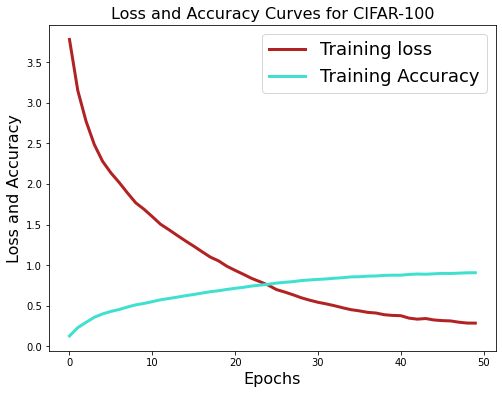

In [1]:
#importing the libraries
import numpy as np
import sklearn.metrics as metrics
from keras.applications import densenet
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# create the model from keras and set weights=None for training from scratch
model = densenet.DenseNet121(weights=None, input_shape=(32,32,3), pooling=None, classes=100)
# printing the model summary
model.summary()
# Splitting traning and testing set
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar100.load_data()
# Converting to float
cifarx_train = cifarx_train.astype('float32')
cifarx_test = cifarx_test.astype('float32')
# converting data into normalize form
cifarx_train = densenet.preprocess_input(cifarx_train)
cifarx_test = densenet.preprocess_input(cifarx_test)
# one-hot encoding
cifarY_train = np_utils.to_categorical(cifary_train, 100)
cifarY_test = np_utils.to_categorical(cifary_test, 100)
# Data Augmentation
datagen_train = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,)
datagen_train.fit(cifarx_train)
# Using Adam and set learning rate 0.001
optimizer = Adam(lr=0.001)  
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
# train the model
history = model.fit(datagen_train.flow(cifarx_train, cifarY_train, batch_size=64, shuffle=True), 
                    steps_per_epoch=len(cifarx_train)/64, epochs=50, validation_data=(cifarx_test, cifarY_test))
# Evaluate the model
scores = model.evaluate(cifarx_test, cifarY_test, verbose=0)
print(" the test accuracy is : %.2f%%" % (scores[1]*100))
# Define plotchart function
def plotchart(history, value):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'], 'firebrick', linewidth=3.0)
    plt.plot(history.history['accuracy'], 'turquoise', linewidth=3.0)
    plt.legend(['Training loss', 'Training Accuracy'], fontsize=18)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss and Accuracy', fontsize=16)
    plt.title('Loss and Accuracy Curves for {}'.format(value), fontsize=16)
    plt.show()
# Plot the training history
plotchart(history, 'CIFAR-100')
